In [31]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from plotly.graph_objects import * 
import warnings
from sklearn.metrics import mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   


import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import numpy as np

Загрузка данных
=====

In [2]:
df = pd.read_csv('../datatest/monthly-car-sales.csv')

In [3]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


Создадим серию, у которой в качестве индекса будет Month, а в качестве значений - количество продаж Sales

<AxesSubplot:xlabel='Month'>

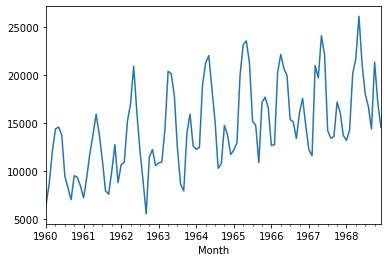

In [4]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
s = df['Sales']
s.index.freq = 'MS'
s.plot()

Задание №1
===

Разделить данные на train и test, оставив на test два года

In [5]:
# your code 
train, test = df[:-24], df[-24:]

In [6]:
train.tail(), test.head()

(            Sales
 Month            
 1966-08-01  15113
 1966-09-01  13401
 1966-10-01  16135
 1966-11-01  17562
 1966-12-01  14720,
             Sales
 Month            
 1967-01-01  12225
 1967-02-01  11608
 1967-03-01  20985
 1967-04-01  19692
 1967-05-01  24081)

Задание №2
===

* Создать модель <code> SimpleExpSmoothing </code>
* Натренировать ее на train данных
* Сделать предсказания как для train, так и для test
* Выбрать метрики и посчитать качества предсказаний для train и для test
* Построить графики, на которых будут как реальные данные, так и предсказания




In [7]:
def print_errors(orig, predict, test_size): 
    mae_train = np.round(mean_absolute_error(orig[:-test_size], predict[:-test_size]),2)
    mae_test = np.round(mean_absolute_error(orig[-test_size:], predict[-test_size:]),2)
    r2_train = np.round(r2_score(orig[:-test_size], predict[:-test_size]),2)
    r2_test = np.round(r2_score(orig[-test_size:], predict[-test_size:]),2)
    print('       >>> Train <<<')
    print(f'MAE = {mae_train}, R2 = {r2_train}\n')
    print('       >>> Test <<<')
    print(f'MAE = {mae_test}, R2 = {r2_test}\n')
    

In [8]:
# predictions for train 
mod = SimpleExpSmoothing(train).fit(optimized=True)
pred_s = mod.predict(0,len(train)-1)
train_s = train['Sales']


# predictions for test
test_size = len(test)
time_index = test['Sales'].index

test_pred = []
for i in range(len(test)): 
    mod_tmp = SimpleExpSmoothing(train_s).fit(optimized=True)
    forecast_tmp = mod_tmp.forecast(1)
    pred_s = pred_s.append(mod_tmp.forecast(1))
    train_s = df.loc[:time_index[i], 'Sales']
    

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: 

In [9]:
print_errors(train_s, pred_s, test_size)

       >>> Train <<<
MAE = 2463.45, R2 = 0.49

       >>> Test <<<
MAE = 3120.88, R2 = 0.01



In [10]:
orig_trace = Scatter(x = train_s.index, y = train_s, name = 'Original data')
train_trace = Scatter(x = pred_s[:-test_size].index, y = pred_s[:-test_size], name = 'Train prediction')
pred_trace = Scatter(x=pred_s[-test_size:].index, y = pred_s[-test_size:], name = 'Test forecast')
iplot(Figure(data=[orig_trace, train_trace, pred_trace]))

Задание №3
===
* Построить модели двойного и тройного экспоненциального сглаживания
* Так же, как и в предыдущем задании, посчитать метрики для train и test
* Построить график

### Double exp smoothing

In [11]:
# your code
train_s = train['Sales']
test_s = test['Sales']

mod_add=ExponentialSmoothing(train_s, trend='add',damped_trend=0.4).fit()#.fittedvalues
mod_mul=ExponentialSmoothing(train_s, trend='mul', damped_trend = 0.4).fit()#.fittedvalues

add_train = mod_add.fittedvalues
mul_train = mod_mul.fittedvalues

add_test = mod_add.forecast(test_size)
mul_test = mod_mul.forecast(test_size)


/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [12]:
orig_data = df['Sales']
mul_pred = pd.concat([mul_train, mul_test], ignore_index = True)
add_pred = pd.concat([add_train, add_test], ignore_index = True)

In [13]:
print('Multiplicative model : ')
print_errors(orig_data, mul_pred, test_size)

Multiplicative model : 
       >>> Train <<<
MAE = 2510.07, R2 = 0.48

       >>> Test <<<
MAE = 3679.4, R2 = -0.45



In [14]:
print('Additive model : ')
print_errors(orig_data, add_pred, test_size)

Additive model : 
       >>> Train <<<
MAE = 2517.77, R2 = 0.47

       >>> Test <<<
MAE = 3961.82, R2 = -0.69



In [15]:
orig_trace = Scatter(x = orig_data.index, y = orig_data, name = 'Original data')
train_trace = Scatter(x = orig_data[:-test_size].index, y = mul_pred[:-test_size], name = 'Train prediction')
pred_trace = Scatter(x=orig_data[-test_size:].index, y = mul_pred[-test_size:], name = 'Test forecast')

layout = Layout(title = 'Mult model')
iplot(Figure(data=[orig_trace, train_trace, pred_trace], 
            layout = layout))

#layout = layout

In [16]:
orig_trace = Scatter(x = orig_data.index, y = orig_data, name = 'Original data')
train_trace = Scatter(x = orig_data[:-test_size].index, y = add_pred[:-test_size], name = 'Train prediction')
pred_trace = Scatter(x=orig_data[-test_size:].index, y = add_pred[-test_size:], name = 'Test forecast')
layout = Layout(title = 'Add model')
iplot(Figure(data=[orig_trace, train_trace, pred_trace], 
            layout = layout))

#layout = layout

### Triple exp smoothing

In [17]:
for trend in ['add', 'mul']: 
    for season in ['add', 'mul']: 
        mod = ExponentialSmoothing(train_s, trend=trend, seasonal=season,seasonal_periods=12)
        mod_fit = mod.fit()
        predictions = mod_fit.forecast(test_size)
        mae = np.round(mean_absolute_error(test_s, predictions),2)
        r2 = np.round(r2_score(test_s, predictions),2)
        print(f'Trend = {trend}, Season = {season}, mae = {mae}, r2 = {r2}')

Trend = add, Season = add, mae = 1828.6, r2 = 0.69
Trend = add, Season = mul, mae = 2223.58, r2 = 0.56
Trend = mul, Season = add, mae = 1671.17, r2 = 0.75
Trend = mul, Season = mul, mae = 2473.66, r2 = 0.49


/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [25]:
mod = ExponentialSmoothing(train_s, trend='mul', seasonal='add',seasonal_periods=12, 
                                damped_trend=0.3).fit()
train_pred = mod.fittedvalues
test_pred = mod.forecast(test_size)
pred_data = pd.concat([train_pred,test_pred], ignore_index=True)
print_errors(orig_data, pred_data, test_size)

       >>> Train <<<
MAE = 1022.09, R2 = 0.91

       >>> Test <<<
MAE = 1722.56, R2 = 0.73



/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [26]:
orig_trace = Scatter(x = orig_data.index, y = orig_data, name = 'Original data')
train_trace = Scatter(x = orig_data[:-test_size].index, y = pred_data[:-test_size], name = 'Train prediction')
pred_trace = Scatter(x=orig_data[-test_size:].index, y = pred_data[-test_size:], name = 'Test forecast')
layout = Layout(title = 'Final model')
iplot(Figure(data=[orig_trace, train_trace, pred_trace], 
            layout = layout))

Задание №4
* Выбрать модель с наиболее подходящими параметрами среди предыдущих 
* Сделать цикл кросс-валидации, где размер test равен одному году
* Посчитать среднее значение выбранных метрик

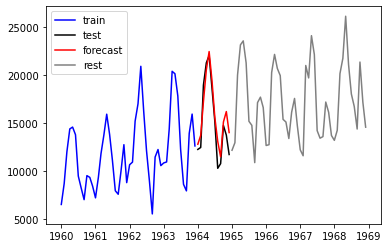

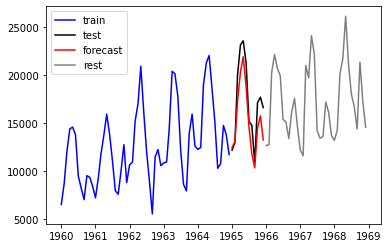

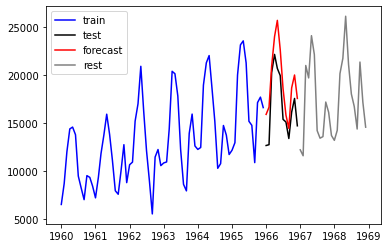

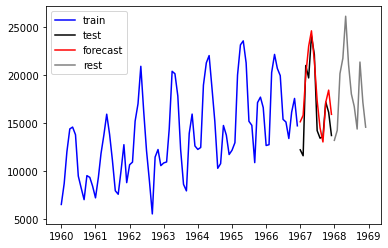

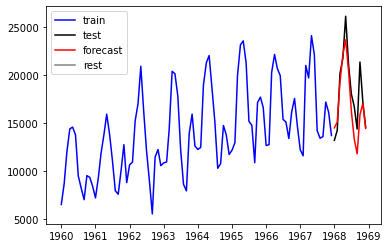

In [34]:
# your code
r2_list = list()
mae_list = list()
n_splits = 5 
test_size = 12 
s = df['Sales']
size = len(s)
for i in reversed(range(n_splits)):
    idx = size - (i+1)*test_size
    train = s[0:idx]
    test = s[idx:idx+test_size]
    rest = s[idx+test_size:]
    
    mod_cv = ExponentialSmoothing(train, trend='mul', seasonal='add',seasonal_periods=12, 
                                 damped_trend=0.2).fit()
    predictions = mod_cv.forecast(len(test))
    
    fig, ax = plt.subplots()
    ax.plot(train, label='train', c = 'blue')
    ax.plot(test, label = 'test', c = 'black')
    ax.plot(predictions, label = 'forecast', c= 'red')
    ax.plot(rest, label = 'rest', c = 'grey')
    ax.legend()
    plt.show()
    
    mae_list.append(mean_absolute_error(test, predictions))
    r2_list.append(r2_score(test, predictions))

In [35]:
print('>>>>>>>>>>>RESULT<<<<<<<<<<<<')
    
print(f'MAE = {np.round(np.mean(mae_list),2)}')
print(f'R2 = {np.round(np.mean(r2_list),2)}')

>>>>>>>>>>>RESULT<<<<<<<<<<<<
MAE = 1808.2
R2 = 0.62
